# Project 1: Classifying ENSO


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import pandas as pd
#nice figures
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['font.size'] = 12

### a

## Data read + plotting NINO3.4

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


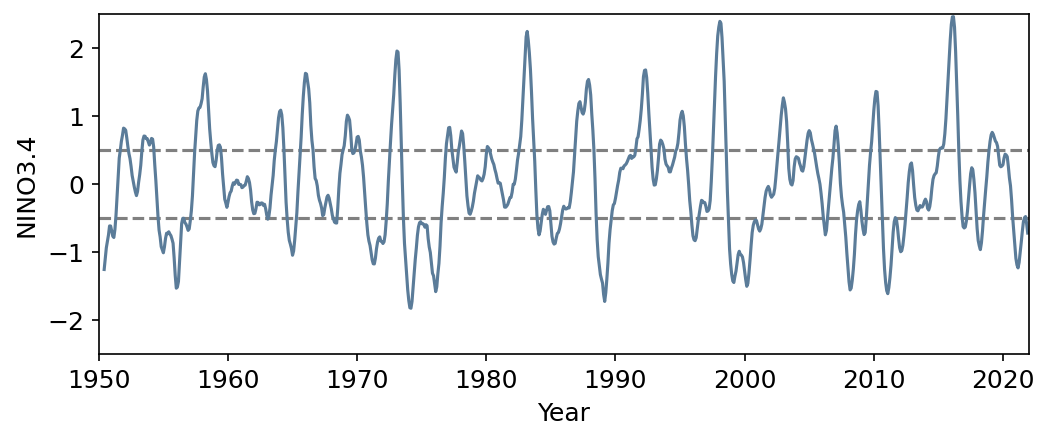

In [2]:
import wget
# url = 'ERSSTv5_deseasoneddetrended_5monthrunningmean_1950-2021.nc'
filename = 'ERSSTv5_deseasoneddetrended_5monthrunningmean_1950-2021.nc'
sstds = xr.open_dataset(filename)
sst = sstds.sst
time = sstds.time

ninolat1 = -5
ninolat2 = 5
ninolon1 = 190
ninolon2 = 240

sstnino = np.asarray(sst.sel(lat=slice(ninolat1,ninolat2),lon=slice(ninolon1,ninolon2)))
nino34 = np.nanmean(sstnino,axis=(1,2))
timevec = np.arange(1950+(5/12),2022,1/12)

plt.figure(figsize=(8,3))
plt.plot(timevec,nino34,color='xkcd:slate blue')
plt.hlines(0.5,1950,2022,linestyle='dashed',color='grey')
plt.hlines(-0.5,1950,2022,linestyle='dashed',color='grey')
plt.xlim(1950,2022)
plt.ylim(-2.5,2.5)
plt.xlabel("Year")
plt.ylabel("NINO3.4")
plt.show()

In [3]:
sst_glob = np.asarray(sst)

# assuming your array is named 'data'
data = np.nan_to_num(sst_glob) # replace all NaN values with 0

# standardize the data
mean = np.mean(data)
std = np.std(data)
standardized_sst = (data ) / std

### b

In [4]:
zippednino = zip(sstnino)
np.shape(sstds.time)


(859,)

In [5]:
dic = {"Time": timevec, "Nino34": nino34, 'sst': zippednino, 'Timexr': sstds.time}

df = pd.DataFrame(dic)

df['Class'] = (df['Nino34'] > 0.5).astype(int)


df = pd.concat([df[df["Nino34"]>0.5], df[df["Nino34"]<-0.5]])

In [6]:
df = df.sort_values(by='Time')


In [7]:
df

,Time,Nino34,sst,Timexr,Class
0,1950.416667,-1.254876,"([[-1.0450294806857312, -1.104711745666846, -1...",1950-06-01 00:00:00,0
1,1950.500000,-1.089870,"([[-1.0917323730053008, -1.155787150026033, -1...",1950-07-01 00:00:00,0
2,1950.583333,-0.935813,"([[-1.0280932395680342, -1.0694640253324854, -...",1950-08-01 00:00:00,0
3,1950.666667,-0.841518,"([[-0.9278482711698303, -0.9654956369670629, -...",1950-09-01 00:00:00,0
4,1950.750000,-0.746620,"([[-0.839711914832173, -0.8660278284356249, -0...",1950-10-01 00:00:00,0
...,...,...,...,...,...
852,2021.416667,-0.853737,"([[-0.8343289481405257, -0.8325048741959872, -...",2021-06-15 00:00:00,0
853,2021.500000,-0.692181,"([[-0.6453224593565795, -0.6396578542387679, -...",2021-07-15 00:00:00,0
854,2021.583333,-0.552627,"([[-0.5059924842445085, -0.49691650139580623, ...",2021-08-15 00:00:00,0
857,2021.833333,-0.581386,"([[-0.5816495620821229, -0.5687511892048122, -...",2021-11-15 00:00:00,0


In [8]:
training = df[df['Time'] <= 2000]
validation = df[(df['Time'] > 2000) & (df['Time'] <= 2010)]
testing = df[df['Time'] > 2010]

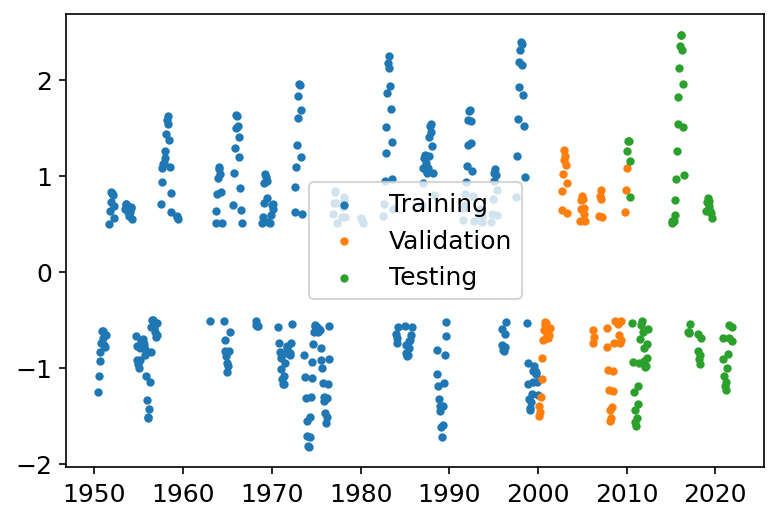

In [9]:
plt.scatter(training['Time'], training['Nino34'], marker='.', label='Training')
plt.scatter(validation['Time'], validation['Nino34'], marker='.', label='Validation')
plt.scatter(testing['Time'], testing['Nino34'], marker='.', label='Testing')
plt.legend(loc='center')

In [10]:
testing

,Time,Nino34,sst,Timexr,Class
716,2010.083333,1.259932,"([[1.1786615783414245, 1.2156391567393605, 1.2...",2010-02-15 00:00:00,1
717,2010.166667,1.365462,"([[1.2895106421986129, 1.3408271801145486, 1.3...",2010-03-15 00:00:00,1
718,2010.250000,1.358320,"([[1.2747031966563869, 1.3340442257065337, 1.3...",2010-04-15 00:00:00,1
719,2010.333333,1.153134,"([[1.1239609214022472, 1.1765288494235187, 1.2...",2010-05-15 00:00:00,1
720,2010.416667,0.780748,"([[0.840918459990881, 0.8746027675740976, 0.89...",2010-06-15 00:00:00,1
...,...,...,...,...,...
852,2021.416667,-0.853737,"([[-0.8343289481405257, -0.8325048741959872, -...",2021-06-15 00:00:00,0
853,2021.500000,-0.692181,"([[-0.6453224593565795, -0.6396578542387679, -...",2021-07-15 00:00:00,0
854,2021.583333,-0.552627,"([[-0.5059924842445085, -0.49691650139580623, ...",2021-08-15 00:00:00,0
857,2021.833333,-0.581386,"([[-0.5816495620821229, -0.5687511892048122, -...",2021-11-15 00:00:00,0


### c

In [11]:
from torch.utils.data import DataLoader, TensorDataset

data = standardized_sst.reshape(standardized_sst.shape[0], -1)

# Split the data into training, validation, and testing sets
train_data = torch.tensor(data[training.index])
train_targets = torch.tensor(training['Class'].values)
val_data = torch.tensor(data[validation.index])
val_targets = torch.tensor(validation['Class'].values)
test_data = torch.tensor(data[testing.index])
test_targets = torch.tensor(testing['Class'].values)



# Convert input data to torch.float32
train_data = train_data.to(torch.float32)
val_data = val_data.to(torch.float32)
test_data = test_data.to(torch.float32)

train_targets = train_targets.to(torch.long)
val_targets = val_targets.to(torch.long)
test_targets = test_targets.to(torch.long)




# create TensorDatasets for train and validation data
train_dataset = TensorDataset(train_data, train_targets)
val_dataset = TensorDataset(val_data, val_targets)
test_dataset = TensorDataset(test_data, test_targets)


# create DataLoaders for train and validation data
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
loaders = {'train': train_loader,
          'test': test_loader,
          'validate': val_dataset}


In [12]:
import torch.nn as nn

class FNN(nn.Module):
    def __init__(self, method, input_size, hidden_size, num_classes):
        super(FNN, self).__init__()
        self.method = method
        self.fc1 = nn.Linear(input_size, hidden_size)
        if method == "ReLU":
            self.activation = nn.ReLU()
        elif method == "Sigmoid":
            self.activation = nn.Sigmoid()
        elif method == "SoftMax":
            self.activation = nn.Softmax()
        else:
            self.activation = nn.ReLU()
        self.hidden_layers = nn.ModuleList()
        for _ in range(2):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        for layer in self.hidden_layers:
            out = layer(out)
            out = self.activation(out)
        out = self.fc2(out)
        return out


In [13]:
def train(num_epochs, fnn, loaders, lr=0.001):
    # train the model
    optimizer = torch.optim.Adam(fnn.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    lambd = 1e-5 # regularization strength
    train_losses = []
    val_losses = []
    train_errors = [] # list to store training errors
    val_accuracies = []
    for epoch in range(num_epochs):
        # set model to train mode
        fnn.train()
        # iterate over train data in batches
        num_correct = 0 # count number of correctly classified examples
        num_examples = 0 # count total number of examples
        for i, (data, targets) in enumerate(loaders['train']):
            # forward pass
            outputs = fnn(data)
            loss = criterion(outputs, targets)
            # add L2 regularization
            l2_reg = torch.tensor(0.)
            for param in fnn.parameters():
                l2_reg += torch.norm(param)
            loss += lambd * l2_reg
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # update counts for calculating training error
            _, predicted = torch.max(outputs.data, 1)
            num_correct += (predicted == targets).sum().item()
            num_examples += targets.size(0)
        train_losses.append(loss.item())
        # calculate and store training error
        train_error = 100 * (1 - num_correct / num_examples)
        train_errors.append(train_error)
        # set model to evaluation mode
        fnn.eval()
        # evaluate on validation set

        val_loss = 0
        val_num_correct = 0 # count number of correctly classified examples
        val_num_examples = 0 # count total number of examples
        with torch.no_grad():
            for i, (data, targets) in enumerate(loaders['validate']):
                val_outputs = fnn(data)
                val_loss += criterion(val_outputs, targets).item()
#                 print(np.shape(val_outputs))
#                 # update counts for calculating validation accuracy
                _, predicted = torch.max(val_outputs.data,val_outputs.dim()-1)
                val_num_correct += (predicted == targets).sum().item()
                val_num_examples += targets.numel()
            val_loss /= len(loaders['validate'])
            val_losses.append(val_loss)
            # calculate and store validation accuracy
            val_accuracy = 100 * val_num_correct / val_num_examples
            val_accuracies.append(val_accuracy)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}, train error, {train_errors[-1]}, val acciracy{val_accuracies[-1]}')
    return train_losses, val_losses


In [14]:
def evaluate(fnn, test_data, test_targets):
    fnn.eval()
    with torch.no_grad():
        # evaluate on test set
        test_outputs = fnn(test_data)
        _, predicted = torch.max(test_outputs.data, 1)
        total = test_targets.size(0)
        correct = (predicted == test_targets).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy on data set: {accuracy:.2f}%', 'with model', fnn.method)


## d

In [15]:
input_size = train_data.shape[1] # number of features in input data
hidden_size = 12 # number of neurons in hidden layer
num_classes = 2 # number of classes

model = FNN("ReLU", input_size, hidden_size, num_classes)
trl, vls= train(num_epochs=20,fnn=model,loaders=loaders, lr=0.001)

Epoch [1/20], Loss: 0.1500, Val Loss: 0.1739, train error, 8.510638297872342, val acciracy100.0
Epoch [2/20], Loss: 0.0313, Val Loss: 0.0278, train error, 0.911854103343468, val acciracy100.0
Epoch [3/20], Loss: 0.0082, Val Loss: 0.0042, train error, 0.0, val acciracy100.0
Epoch [4/20], Loss: 0.0022, Val Loss: 0.0021, train error, 0.0, val acciracy100.0
Epoch [5/20], Loss: 0.0005, Val Loss: 0.0017, train error, 0.0, val acciracy100.0
Epoch [6/20], Loss: 0.0001, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [7/20], Loss: 0.0152, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [8/20], Loss: 0.0011, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [9/20], Loss: 0.0002, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [10/20], Loss: 0.0002, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [11/20], Loss: 0.0002, Val Loss: 0.0016, train error, 0.0, val acciracy100.0
Epoch [12/20], Loss: 0.0002, Val Loss: 0.0016, train error, 0.0, val

In [16]:
print('Test data')
evaluate(model,test_data, test_targets)
print('Validation data')
evaluate(model,val_data, val_targets)
print('train data')
# evaluate(model,train_data, train_targets)

Test data
Accuracy on data set: 94.59% with model ReLU
Validation data
Accuracy on data set: 100.00% with model ReLU
train data


(0.0, 20.0)

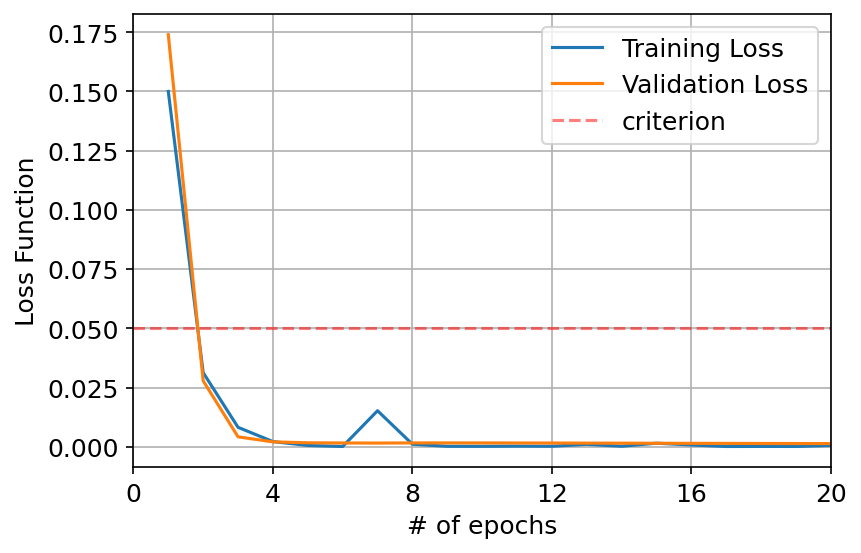

In [22]:
epochs = np.arange(1,21,1)
plt.plot(epochs, trl, label='Training Loss')
plt.plot(epochs, vls, label='Validation Loss')

plt.xlabel('# of epochs')
plt.ylabel('Loss Function')
plt.axhline(0.05, c='red', label= 'criterion', linestyle='--', alpha=0.5)

plt.grid()
# plt.axvline(9)
plt.legend()
plt.xticks(np.arange(0,21,4), np.arange(0,21,4))
plt.xlim(0,20)


## e

In [107]:
scalar = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])

In [108]:
def LRoptim(scalar):
    endtr, endvl = [], []
    for val in scalar:
        model = FNN("Sigmoid", input_size, hidden_size, num_classes)
        trl_loop, vls_loop = train(num_epochs=20,fnn=model,loaders=loaders, lr=0.0001*val)
        endtr.append(trl_loop[-1])
        endvl.append(vls_loop[-1])
    return endtr, endvl

## Uncomment next cell for optimising learning rate

In [109]:
# endtr, endvl = LRoptim(scalar)

# plt.plot(scalar*0.001, endtr)
# plt.grid()
# plt.xlabel('Learning rate')
# plt.ylabel('Training error')
# plt.xscale('log')

## f

#### Run the dataloader cell again and change "ReLU" to "Sigmoid" in model = fnn(..., input_size,... )

### g

In [110]:
from sklearn.metrics import confusion_matrix

# evaluate on test set
test_outputs = model(test_data)
_, predicted = torch.max(test_outputs.data, 1)

# calculate confusion matrix
cm = confusion_matrix(test_targets, predicted)
print(cm)

[[39  4]
 [ 0 31]]


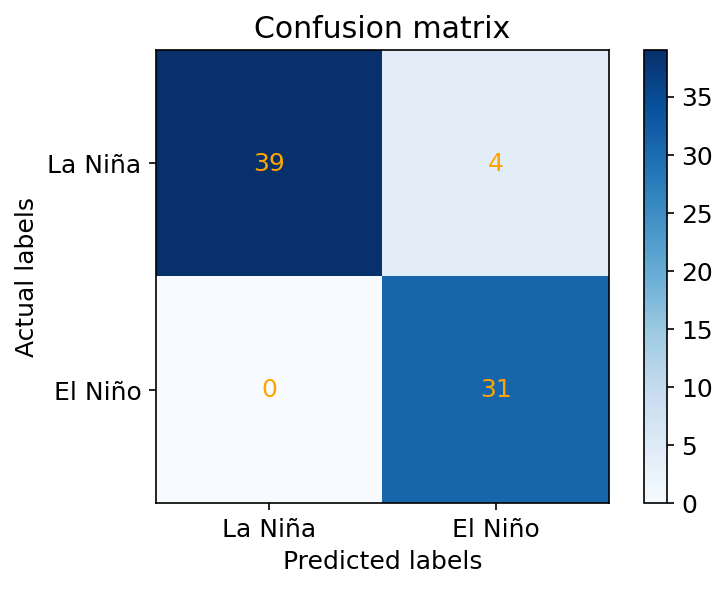

In [111]:
import matplotlib.pyplot as plt

# plot confusion matrix
# plt.figure(figsize=(16,8))
plt.imshow(cm, cmap=plt.cm.Blues, aspect='equal')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(np.arange(2), ['La Niña', 'El Niño'])
plt.yticks(np.arange(2), ['La Niña', 'El Niño'])
plt.title('Confusion matrix')
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='orange')
plt.show()


In [112]:
faults = (predicted-test_targets)

In [113]:
err = []
for i,v in enumerate(faults):
    if v == 1:
        err.append(i)

In [114]:
predicted_np = predicted.numpy()
testing = testing.assign(Class_ML = predicted_np)

In [115]:
faultsst = testing.iloc[err[0]:err[-1]]
faultsst = testing.iloc[err[0]:err[-1]+1]

In [116]:
faultsst

,Time,Nino34,sst,Timexr,Class,Class_ML
798,2016.916667,-0.624338,"([[-0.3622224638115109, -0.40451993760360877, ...",2016-12-15 00:00:00,0,1
799,2017.000000,-0.644087,"([[-0.49441119597483035, -0.5336429036083035, ...",2017-01-15 00:00:00,0,1
800,2017.083333,-0.630447,"([[-0.5231369459604154, -0.55740011643917, -0....",2017-02-15 00:00:00,0,1
801,2017.166667,-0.543174,"([[-0.4668250830309614, -0.4924442555395678, -...",2017-03-15 00:00:00,0,1


In [117]:
faultsst.to_latex()

C:\Users\Lasse\AppData\Local\Temp\ipykernel_34620\3239085181.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  faultsst.to_latex()


'\\begin{tabular}{lrrllrr}\n\\toprule\n{} &         Time &    Nino34 &                                                sst &               Timexr &  Class &  Class\\_ML \\\\\n\\midrule\n798 &  2016.916667 & -0.624338 &  ([[-0.3622224638115109, -0.40451993760360877, ... &  2016-12-15 00:00:00 &      0 &         1 \\\\\n799 &  2017.000000 & -0.644087 &  ([[-0.49441119597483035, -0.5336429036083035, ... &  2017-01-15 00:00:00 &      0 &         1 \\\\\n800 &  2017.083333 & -0.630447 &  ([[-0.5231369459604154, -0.55740011643917, -0.... &  2017-02-15 00:00:00 &      0 &         1 \\\\\n801 &  2017.166667 & -0.543174 &  ([[-0.4668250830309614, -0.4924442555395678, -... &  2017-03-15 00:00:00 &      0 &         1 \\\\\n\\bottomrule\n\\end{tabular}\n'

### h

In [54]:
testing

,Time,Nino34,sst,Timexr,Class,Class_ML
716,2010.083333,1.259932,"([[1.1786615783414245, 1.2156391567393605, 1.2...",2010-02-15 00:00:00,1,1
717,2010.166667,1.365462,"([[1.2895106421986129, 1.3408271801145486, 1.3...",2010-03-15 00:00:00,1,1
718,2010.250000,1.358320,"([[1.2747031966563869, 1.3340442257065337, 1.3...",2010-04-15 00:00:00,1,1
719,2010.333333,1.153134,"([[1.1239609214022472, 1.1765288494235187, 1.2...",2010-05-15 00:00:00,1,1
720,2010.416667,0.780748,"([[0.840918459990881, 0.8746027675740976, 0.89...",2010-06-15 00:00:00,1,1
...,...,...,...,...,...,...
852,2021.416667,-0.853737,"([[-0.8343289481405257, -0.8325048741959872, -...",2021-06-15 00:00:00,0,0
853,2021.500000,-0.692181,"([[-0.6453224593565795, -0.6396578542387679, -...",2021-07-15 00:00:00,0,0
854,2021.583333,-0.552627,"([[-0.5059924842445085, -0.49691650139580623, ...",2021-08-15 00:00:00,0,0
857,2021.833333,-0.581386,"([[-0.5816495620821229, -0.5687511892048122, -...",2021-11-15 00:00:00,0,0


In [90]:
nino = testing[(testing['Class_ML'] == 1) & (testing['Class'] == 1)]
nina = testing[(testing['Class_ML'] == 0) & (testing["Class"] == 0)]

In [91]:
sstds

<xarray.Dataset>
Dimensions:  (time: 859, lat: 89, lon: 180)
Coordinates:
  * time     (time) object 1950-06-01 00:00:00 ... 2021-12-15 00:00:00
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [95]:
class_xr = xr.DataArray(testing['Class_ML'], coords = [testing['Timexr']], dims=['time'])
class_xr_real = xr.DataArray(testing['Class'], coords = [testing['Timexr']], dims=['time'])

In [103]:
sst_mean_nino = sstds.where((class_xr == 1) & (class_xr_real ==1)).mean(dim='time')
sst_mean_nina = sstds.where((class_xr == 0) & (class_xr_real == 0)).mean(dim='time')
err_sst = sstds.where((class_xr == 1) & (class_xr_real==0)).mean(dim='time')

In [100]:
lon = sst_mean_nino.lon
lat = sst_mean_nino.lat

Text(0.5, 1.0, 'El Niño')

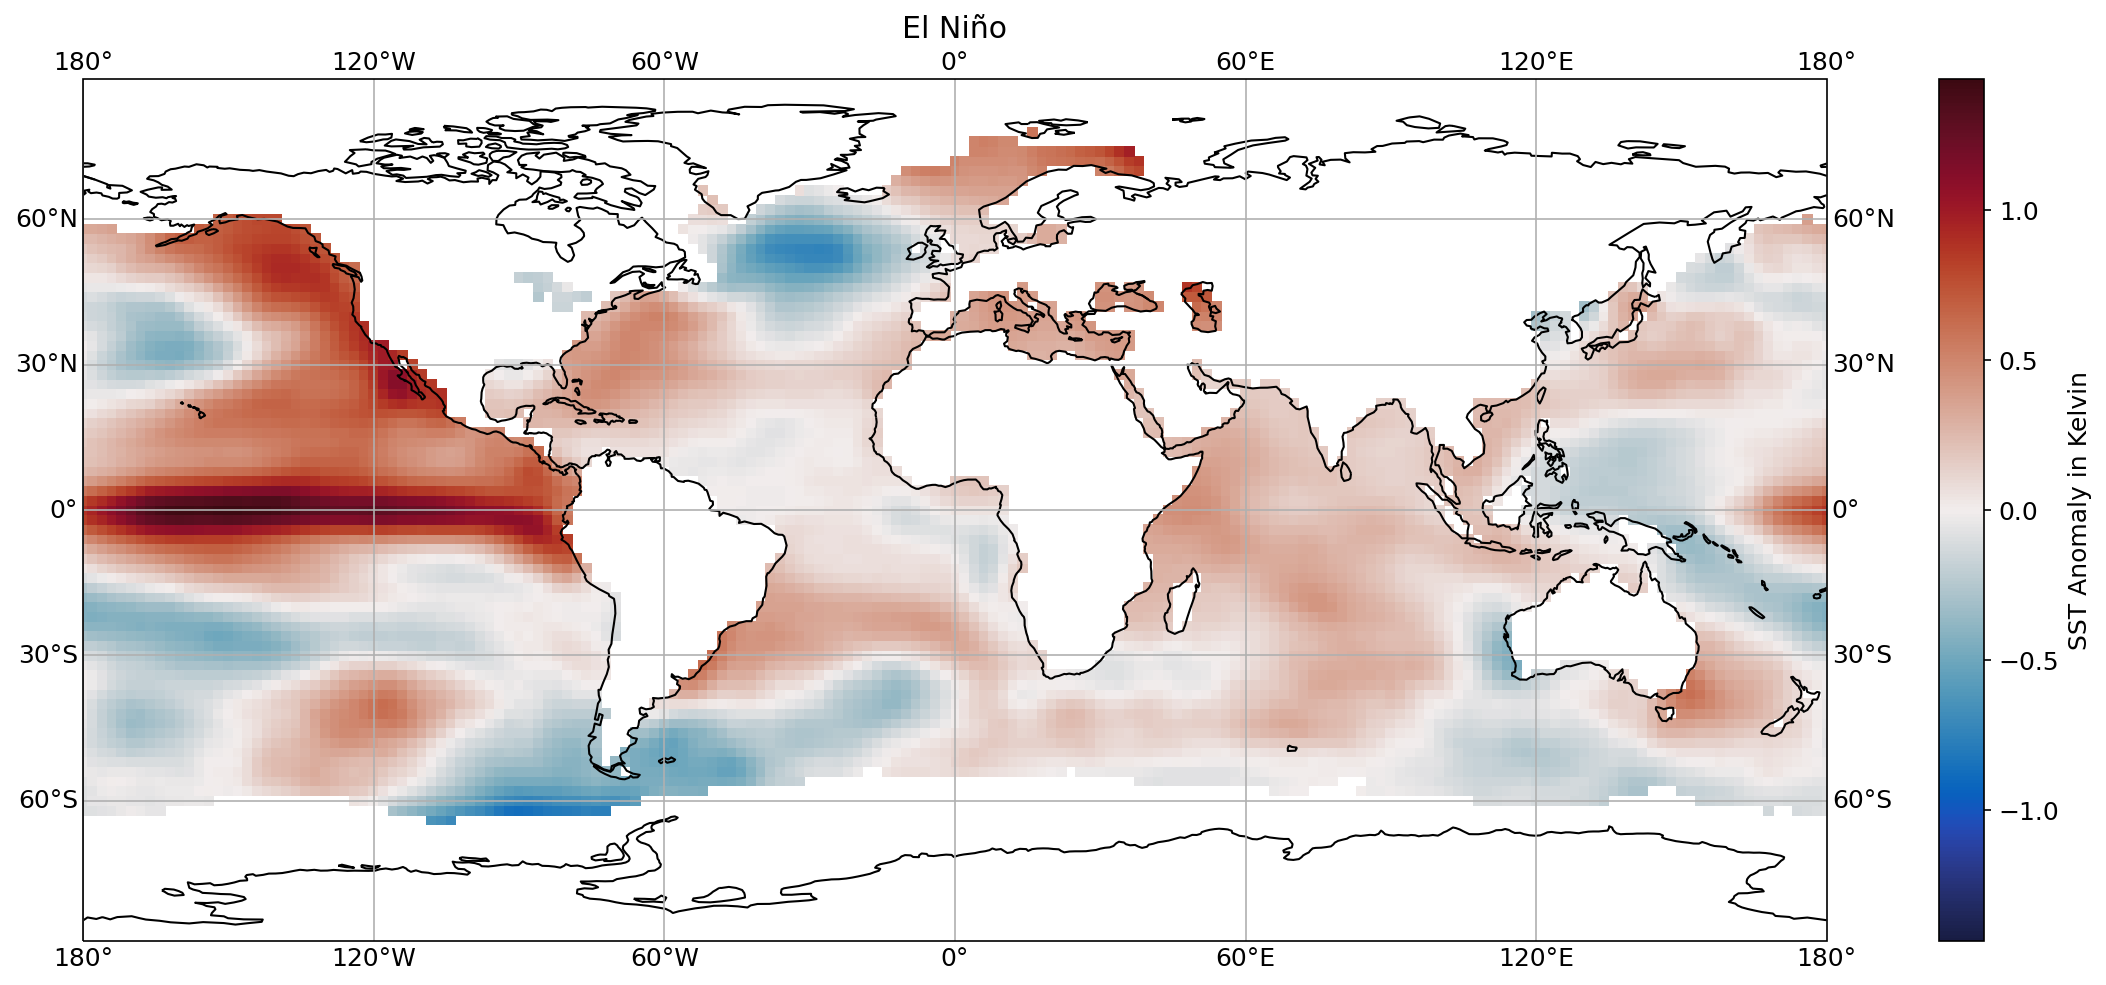

In [121]:
import cartopy.crs as ccrs
import cmocean
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

fig = plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree(0))
im1 = sst_mean_nino.sst.plot(ax=ax, add_colorbar=False,  cmap =cmocean.cm.balance)
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im1, cax=cax, label='SST Anomaly in Kelvin') 
# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('El Niño')
# print(sst_mean_nino.sst.max())

Text(0.5, 1.0, 'La Niña')

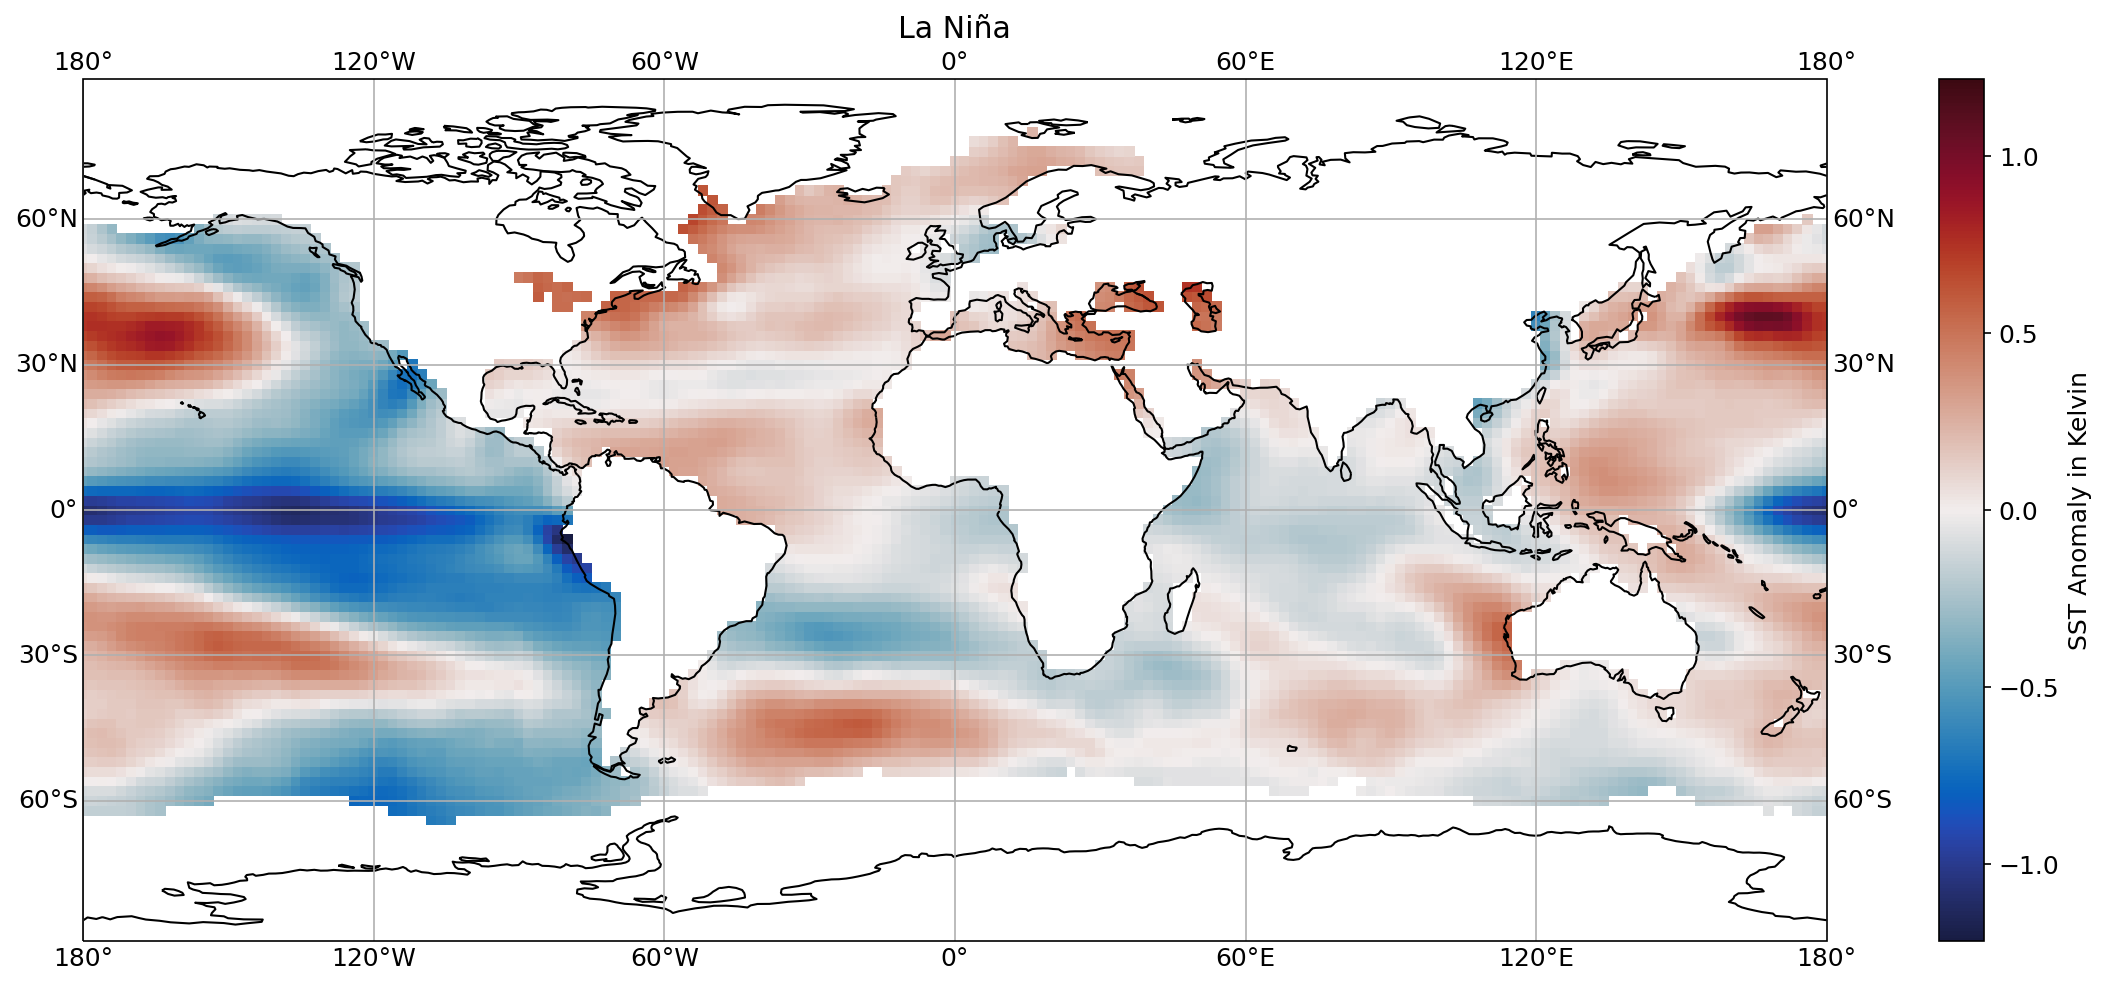

In [122]:
fig = plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree(0))
im1 = sst_mean_nina.sst.plot(ax=ax, add_colorbar=False,  cmap =cmocean.cm.balance)
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im1, cax=cax, label='SST Anomaly in Kelvin')
# plt.clim(-2,2)
# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('La Niña')

Text(0.5, 1.0, 'Wrong predictions')

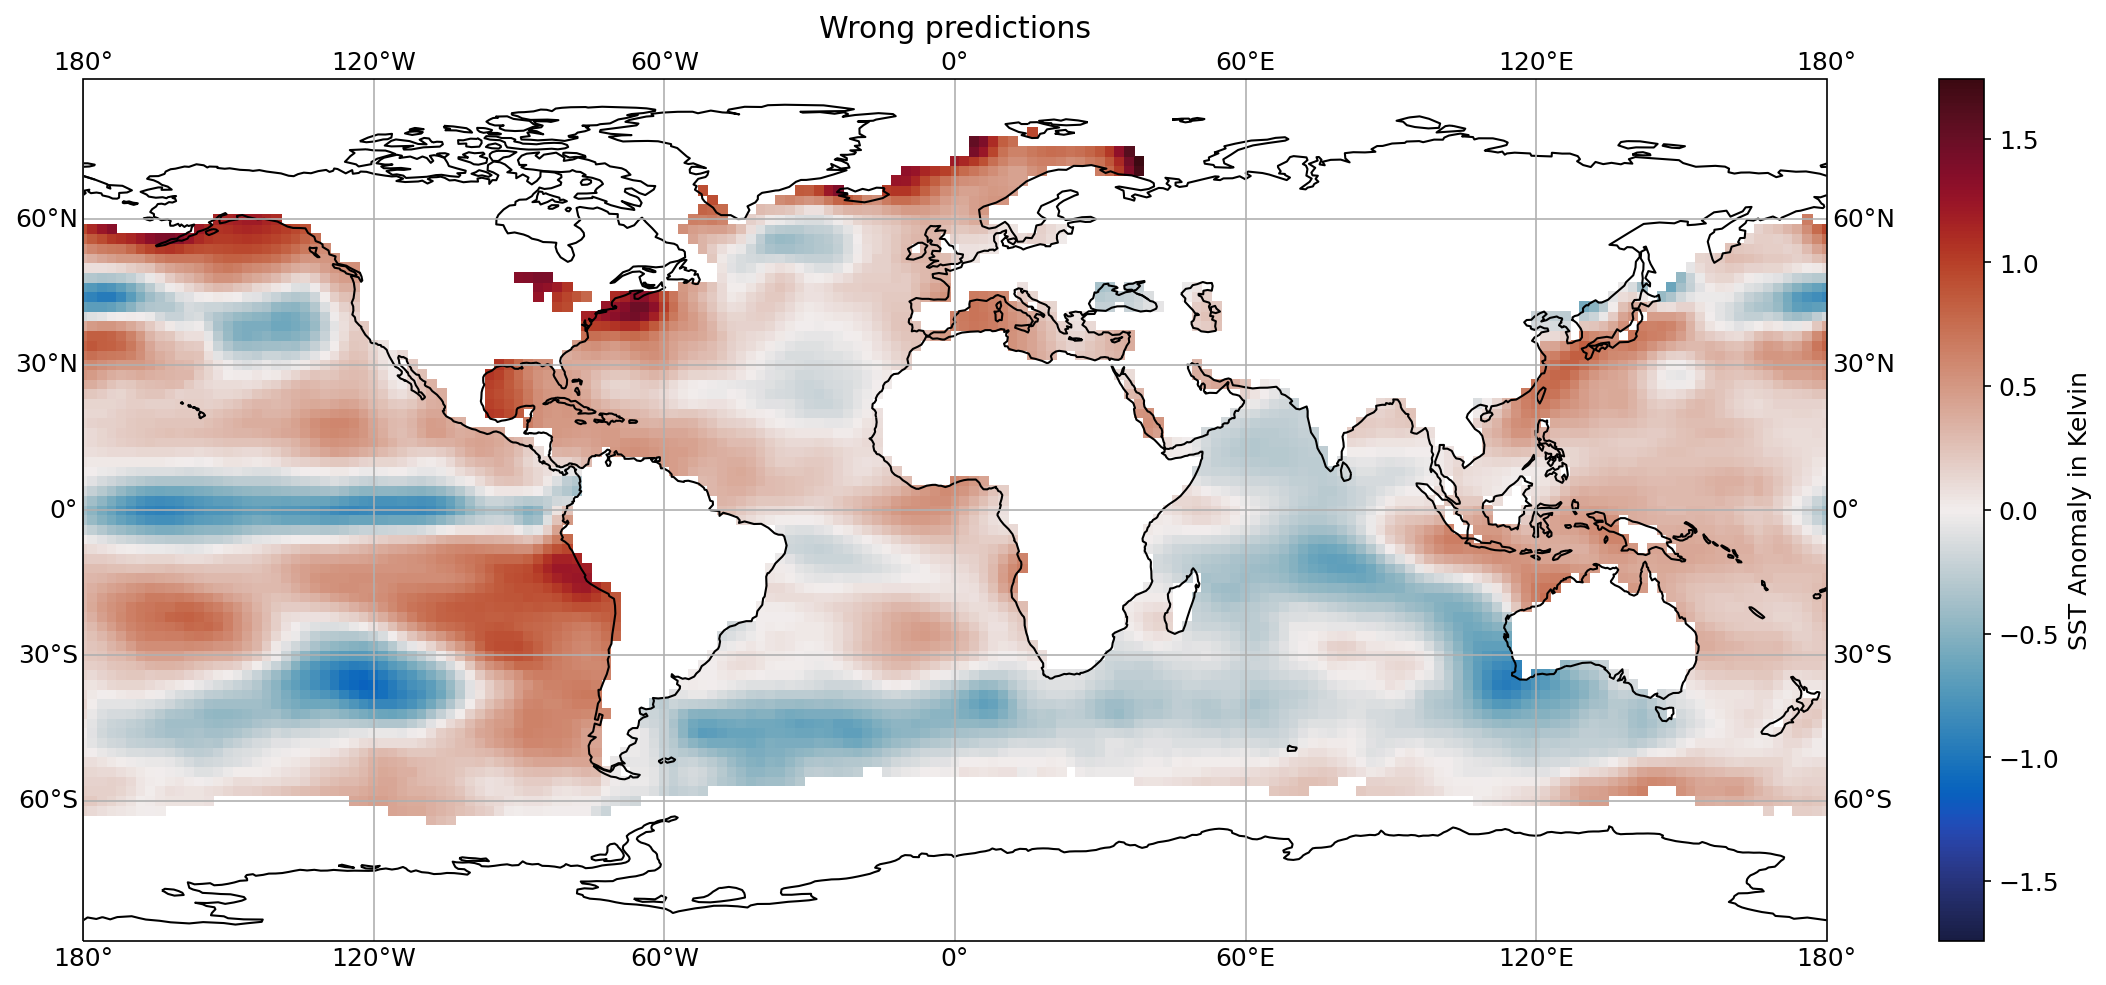

In [123]:
import cartopy.crs as ccrs
import cmocean
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

fig = plt.figure(figsize=(15, 15))

ax = plt.axes(projection=ccrs.PlateCarree(0))
im1 = err_sst.sst.plot(ax=ax, add_colorbar=False,  cmap =cmocean.cm.balance)
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im1, cax=cax, label='SST Anomaly in Kelvin') 
# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_title('Wrong predictions')
